# Explore here

In [15]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=";")
print(df.head()) 


print(df.head())


print(df.info())


print(df.isnull().sum())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

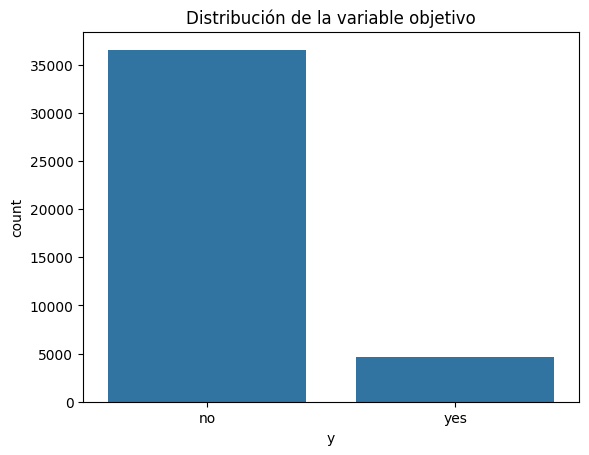

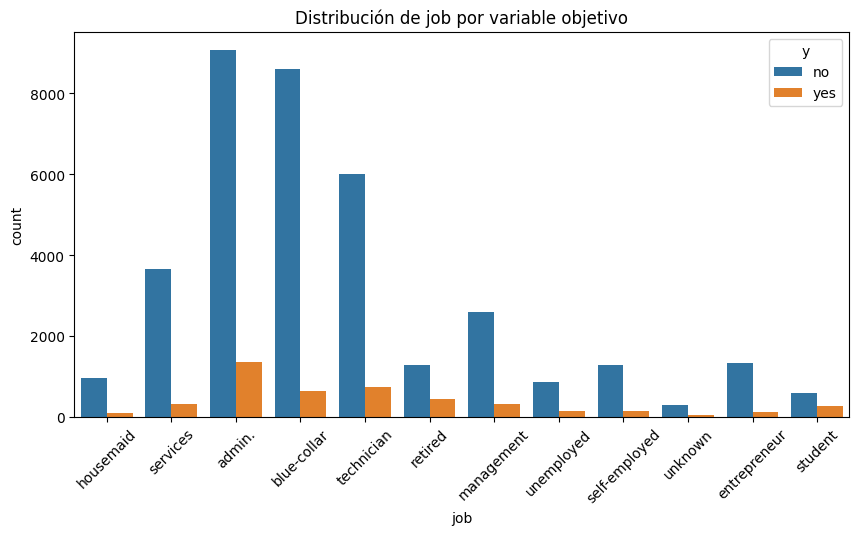

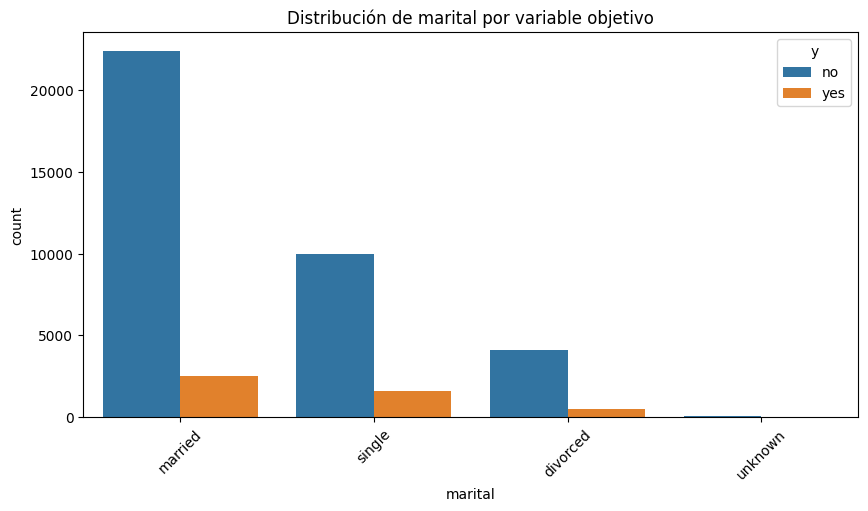

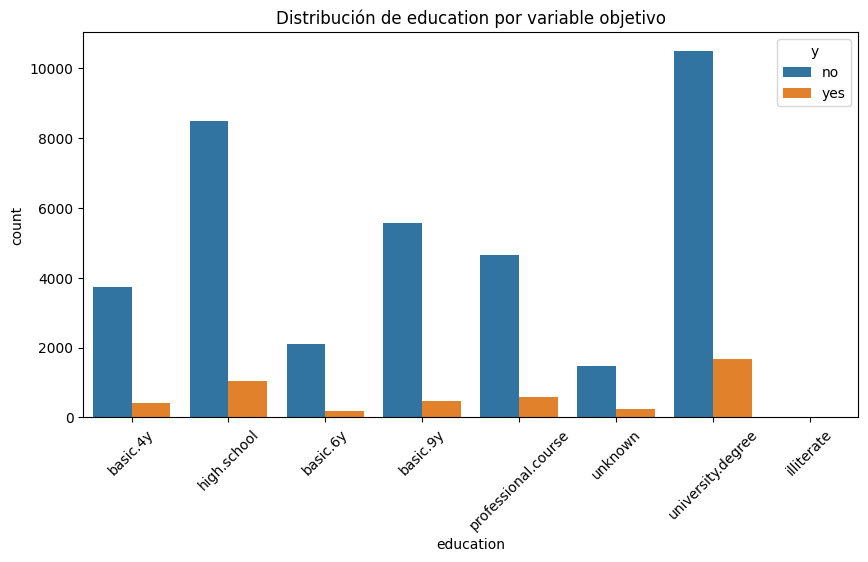

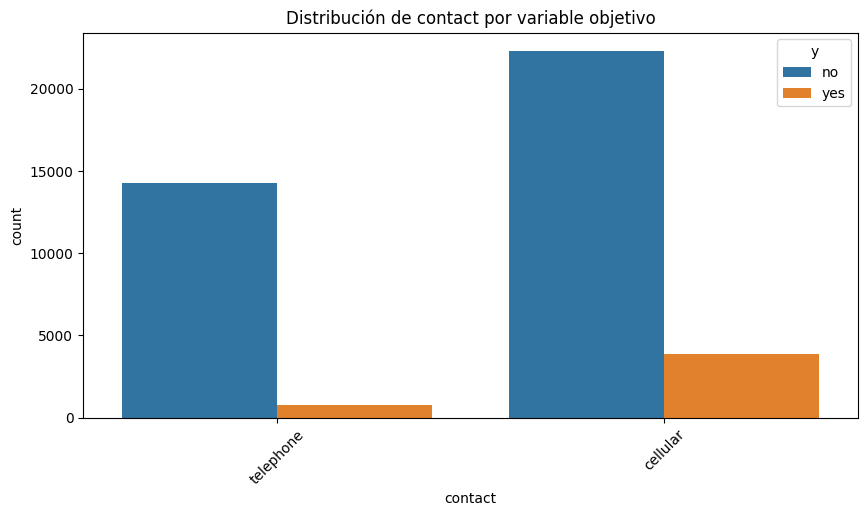

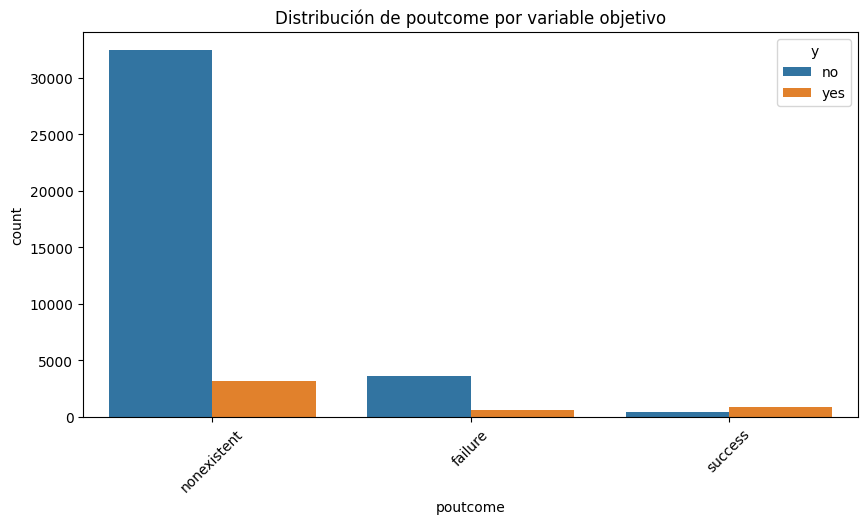

In [9]:



sns.countplot(x=df["y"])
plt.title("Distribución de la variable objetivo")
plt.show()


categorical_vars = ["job", "marital", "education", "contact", "poutcome"]
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[var], hue=df["y"])
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {var} por variable objetivo")
    plt.show()

In [ ]:

#Podemos ver que hay mucha gente que no está casada pero de los que han respondido si la mayor parte están casados aunque no es mucho
#Estudios hay mucha gente que no tiene un grado pero de los que han respondido si la mayoria tiene estudios universitarios
#Trabajo la mayoria de gente estudia administración
df_encoded = pd.get_dummies(df, drop_first=True)


X = df_encoded.drop("y_yes", axis=1)
y = df_encoded["y_yes"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Hacemos un model oe regresión y lo entrenamos
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9115076474872542
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Confusion Matrix:
 [[7103  200]
 [ 529  406]]


In [ ]:
#Mejoramos el modelo logistico para que tenga mejor rendimiento

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear"]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores parámetros: {'C': 1, 'solver': 'lbfgs'}
Mejor puntuación: 0.9110470409711684
